~ This is a kaggle Notebook

# **Frosthack 2k24**

## **Theme: Unleashing the Power of Generative AI**

### **Problem Statement**
**Guardians of Truth** : The spread of misinformation through deepfakes and fake news threatens trust online. Develop AI powered solutions to combat these issues

### **Solution**
In the era of rampant deepfakes and misinformation, Project Bloodline confronts these rising threats. Our platform safeguards users from deceptive content while providing reliable news updates, empowering them to stay informed and resist manipulation. 

**Key Features**

- **Guardian (Deepfake Detection):**  Advanced AI model that analyzes images to expose deepfakes, protecting users from manipulated media.
- **TruthGuard (Fake News Detection):** Combats the spread of misinformation by pinpointing fake news articles, promoting truth and transparency.
- **News Update (News-Bot):**  Delivers trustworthy news updates from reputable sources, enabling users to stay informed about global events.

**Team: The BLOODLINE** 🔥🔥

Team Members:
1) Toshan Gupta
2) Naman Singhania
3) Mayank Goel
4) Vishnu


# **TRAINING Fake News Detection Model**

- Accuracy : 92%

Dataset links:

1. Bharat fake news kosh [Link](https://www.kaggle.com/datasets/man2191989/bharatfakenewskosh)

2. IFND dataset [Link](https://www.kaggle.com/datasets/sonalgarg174/ifnd-dataset)

3. Fake real news : [Link](https://www.kaggle.com/datasets/imbikramsaha/fake-real-news)

    For reloading Python modules automatically and enabling interactive plotting in the notebook.

In [68]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

    Importing all the libraries

In [69]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Importing all the libraries
import os
import torch
import numpy as np
import pandas as pd
import matplotlib as plt
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Libraries for using deep learning models
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.text import *
from fastai.text.all import *
from fastai.metrics import error_rate, accuracy
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [70]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
import warnings
warnings.filterwarnings('ignore')
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

# Reading Data and Preprocessing

In [71]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
path = Path('../input/fake-real-news')
path.ls()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

(#1) [Path('../input/fake-real-news/news_dataset.csv')]

In [72]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
df = pd.read_csv(path/'news_dataset.csv')
df.head()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,label,text
0,REAL,"Payal has accused filmmaker Anurag Kashyap of behaving inappropriately with her in a video that went viral. She maintained her stance while speaking to ETimes and said, “I have wanted to speak about this for a long time. But today, finally I thought I must get it off my head. I had tweeted about my incident sometime ago when the #MeToo movement had happened, but many people told me to delete the tweet else I would stop getting work. My manager too advised me to remove the tweet. I complied. Post that, Anurag blocked me on WhatsApp.”"
1,FAKE,"A four-minute-long video of a woman criticising the government at an anti-Citizenship Amendment Act rally in Delhi earlier in January is going viral with a false claim that the woman shows late Prime Minister Atal Bihari Vajpayee's niece.\n\nThe caption in Hindi translates to: "" Respected Vajpayee ji's niece has finally broken her silence, listen to what she has to say.""\n\n\n\n(Translated from Hindi: माननीय वाजपयी जी की भतीजी ने आखिरकार तोड़ी चुप्पी | जानिए क्या कहा)\n\nAlso Read: Muslim Politician Disguised As A Hindu In Anti-CAA Protests?\n\nThe video comes at a time when protests again..."
2,FAKE,"Republic Poll, a fake Twitter account imitating the Arnab Goswami-led Republic TV, is angering netizens with its controversial polls as Twitter users including journalists mistake it for the channel's official account.\n\n\n\nThe fake account (@RepublicPoll) uses a logo very similar to Republic TV's logo and does not mention in its bio whether it is related to Republic TV or if it is a fan account. Twitter's rules require that a fan account or parody account should indicate the same.\n\nAlso Read:Did Nita Ambani Ask For Support For CAA?\n\n\n\n\n\nSiddharth Varadarajan, founding editor of ..."
3,REAL,"Delhi teen finds place on UN green list, turns glass into sand\n\nNEW DELHI: Udit Singhal , who founded a startup to turn glass bottles into sand , has been named among 17 people in the United Nation’s 2020 Class of Young Leaders for Sustainable Development Goals (SDGs). The programme is a flagship initiative that recognises the efforts of young people in driving action and galvanising others in support of UN’s 2030 agenda for sustainable development.Singhal, an 18-year-old who lives near Mandi House, told TOI, “I feel proud to represent India. Along with 16 others, I’ll work to motivate y..."
4,REAL,"Delhi: A high-level meeting underway at residence of Rajya Sabha Chairman, Venkaiah Naidu, over the ruckus created… https://t.co/OfoRpOwd4b — ANI (@ANI) 1600599438000\n\nA watershed moment in the history of Indian agriculture! Congratulations to our hardworking farmers on the passage… https://t.co/CdLW6Itzmc — Narendra Modi (@narendramodi) 1600595449000\n\nFor decades, the Indian farmer was bound by various constraints and bullied by middlemen. The bills passed by Parli… https://t.co/GfF1nhaFeZ — Narendra Modi (@narendramodi) 1600595492000\n\nOur agriculture sector is in desperate need of ..."


# **Reading datasets**

1) Reading csv file

2) Dropping unnecessary columns

3) Changing label types

4) Renaming columns

In [73]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Reading csv file
df1=pd.read_csv("../input/ifnd-dataset/IFND.csv",encoding='latin1')

#Dropping unnecessary columns
df1.drop(columns=['id','Web','Image','Date','Category'],inplace=True)

#Changing label types
df1['Label'] = df1['Label'].apply(lambda x: 'REAL' if x == 'TRUE' else 'FAKE')    

#Renaming columns
df1.rename(columns={'Statement': 'text', 'Label': 'label'}, inplace=True)
df1
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,text,label
0,"WHO praises India's Aarogya Setu app, says it helped in identifying COVID-19 clusters",REAL
1,"In Delhi, Deputy US Secretary of State Stephen Biegun pitches for Pax Indo-Pacifica",REAL
2,LAC tensions: China's strategy behind deliberately failing talks with India,REAL
3,India has signed 250 documents on Space cooperation with 59 countries: ISRO chief,REAL
4,Tamil Nadu chief minister's mother passes away at 93,REAL
...,...,...
56709,Fact Check: This is not Bruce Lee playing ping-pong with Nunchaku,FAKE
56710,Fact Check: Did Japan construct this bridge in 24 hours?,FAKE
56711,Fact Check: Viral video of Mexico earthquake is 2 years old,FAKE
56712,Fact Check: Ballet performance by Chinese couple goes viral with wrong claim,FAKE


In [74]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
!pip install openpyxl
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [75]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Reading csv file
df2 = pd.read_excel('../input/bharatfakenewskosh/bharatfakenewskosh (3).xlsx')
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [76]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Dropping unnecessary columns
df2=df2[['Eng_Trans_News_Body','Label']]

#Changing label types
df2['Label'] = df2['Label'].apply(lambda x: 'REAL' if x == 'TRUE' else 'FAKE') 

#Renaming columns
df2.rename(columns={'Eng_Trans_News_Body': 'text', 'Label': 'label'}, inplace=True)
df2
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,text,label
0,"A video is viral on social media in which a journalist can be seen questioning Home Minister Amit Shah. In the video, journalist asked Amit Shah…",FAKE
1,"A video of Prime Minister Narendra Modi being honored with a gold chain has gone viral on social media. It is being claimed that ""Sultan of Arabia""…",FAKE
2,"Recently, Nupur Sharma made an objectionable comment on Prophet Mohammed in the TV debate, after which there was an atmosphere of resentment across the country. Nupur Sharma in many parts of the country…",FAKE
3,"A video is viral on social media. While sharing this, it is being claimed that after the victory of Muslim sarpanch in Katni, Madhya Pradesh, Pakistan is of Zindabad…",FAKE
4,"A video of Rahul Gandhi has gone viral on social media. In the video, Rahul is sitting in Gandhi where a woman is asking him questions. This woman says:…",FAKE
...,...,...
26227,"The situation in Ukraine is getting tougher. Meanwhile, some photos are getting viral on the internet with the claim that The Russian invaders are...",FAKE
26228,"After the formation of the Aam Aadmi Party government in Punjab, there has been a flood of misleading claims on Societymedia. Some people...",FAKE
26229,Societymedia is a web of misleading and fake information. The veracity and validity of the information disseminated here is questionable. This is also...,FAKE
26230,"Amidst the invasion of Ukraine, a big claim has been made quoting Russian President Vladimir Putin. In which it is said that Putin has...",FAKE


    Concatenation of data

In [77]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Arranging the columns in same order
df1 = df1[df.columns]
df2=df2[df.columns]

#Concatenating data
data=pd.concat([df, df1,df2], axis=0, ignore_index=True)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [78]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
data.info()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86675 entries, 0 to 86674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   86675 non-null  object
 1   text    85795 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


**Information about dataset:**

87 k news articles/facts
- 47 k Fake articles/facts

- 40 k Real articles/facts

In [79]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
data.describe()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,label,text
count,86675,85795
unique,2,82936
top,FAKE,Highest IPL score in Dubai\n\nMilestones to watch out for:\n\nPreview\n\nLeaving things to chance is not what #CaptainPunjab does... he creates chances! 💪🏻#SaddaPunjab #Dream11IPL… https://t.co/2hJH7DXcWb — Kings XI Punjab (@lionsdenkxip) 1600593907000\n\nSunrisers Hyderabad 184/1 vs Delhi Daredevils (now Delhi Capitals ) in 2014Chris Gayle need 16 more runs to get to 4500-run mark in the IPL KL Rahul needs 23 more to complete 2000 IPL runsAmit Mishra needs 3 more scalps and to complete 100 wickets for Delhi Capitals Rishabh Pant needs 6 more maximums to complete 100 IPL sixesHere's KL Rah...
freq,47023,79


# **Preprocessing data**

In [90]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
import re
def preprocess(text):
    # converting into string and lowercasing all characters
    text=str(text)
    text=text.lower()

    #Removing digits
    text=re.sub(r'\d','',text)

    #Removing new lines
    text=re.sub(r'\n',' ',text)

    #Removing http links
    text=re.sub(r'https?://S+','',text)

    #Removing <.>
    text=re.sub(r'<.*?>','',text)
    text=re.sub(r'[^\w\s]','',text)
    return text
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [91]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Applying preprocess functions
data['text']=data['text'].apply(preprocess)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

In [92]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
data
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,label,text
0,REAL,payal has accused filmmaker anurag kashyap of behaving inappropriately with her in a video that went viral she maintained her stance while speaking to etimes and said i have wanted to speak about this for a long time but today finally i thought i must get it off my head i had tweeted about my incident sometime ago when the metoo movement had happened but many people told me to delete the tweet else i would stop getting work my manager too advised me to remove the tweet i complied post that anurag blocked me on whatsapp
1,FAKE,a fourminutelong video of a woman criticising the government at an anticitizenship amendment act rally in delhi earlier in january is going viral with a false claim that the woman shows late prime minister atal bihari vajpayees niece the caption in hindi translates to respected vajpayee jis niece has finally broken her silence listen to what she has to say translated from hindi मननय वजपय ज क भतज न आखरकर तड चपप जनए कय कह also read muslim politician disguised as a hindu in anticaa protests the video comes at a time when protests against the citizenship amendment act and a proposed na...
2,FAKE,republic poll a fake twitter account imitating the arnab goswamiled republic tv is angering netizens with its controversial polls as twitter users including journalists mistake it for the channels official account the fake account republicpoll uses a logo very similar to republic tvs logo and does not mention in its bio whether it is related to republic tv or if it is a fan account twitters rules require that a fan account or parody account should indicate the same also readdid nita ambani ask for support for caa siddharth varadarajan founding editor of the wirein in a now deleted...
3,REAL,delhi teen finds place on un green list turns glass into sand new delhi udit singhal who founded a startup to turn glass bottles into sand has been named among people in the united nations class of young leaders for sustainable development goals sdgs the programme is a flagship initiative that recognises the efforts of young people in driving action and galvanising others in support of uns agenda for sustainable developmentsinghal an yearold who lives near mandi house told toi i feel proud to represent india along with others ill work to motivate youths and achieve sdgs i hope to be...
4,REAL,delhi a highlevel meeting underway at residence of rajya sabha chairman venkaiah naidu over the ruckus created httpstcooforpowdb ani ani a watershed moment in the history of indian agriculture congratulations to our hardworking farmers on the passage httpstcocdlwitzmc narendra modi narendramodi for decades the indian farmer was bound by various constraints and bullied by middlemen the bills passed by parli httpstcogffnhafez narendra modi narendramodi our agriculture sector is in desperate need of latest technology that assists the industrious farmers now with th httpstcovgkoppqb ...
...,...,...
86670,FAKE,the situation in ukraine is getting tougher meanwhile some photos are getting viral on the internet with the claim that the russian invaders are
86671,FAKE,after the formation of the aam aadmi party government in punjab there has been a flood of misleading claims on societymedia some people
86672,FAKE,societymedia is a web of misleading and fake information the veracity and validity of the information disseminated here is questionable this is also
86673,FAKE,amidst the invasion of ukraine a big claim has been made quoting russian president vladimir putin in which it is said that putin has


In [94]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Saving data as new file
data.to_csv("combined_data.csv")
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

# **Training model**

1. Creating a DataLoader object `dls` containg training and validation data
      - Validation split- 20%

2. Initializes a text classifier model (`learn`) using the AWD-LSTM architecture 

      Specifies the DataLoader (`dls`) and evaluation metric (accuracy).

3. Trraining the text classifier model (`learn`) using the one-cycle policy
   - Epochs=10
   - Learning Rate=0.01

4. Creating an interpretation object (`interp`) from the trained model (`learn`) for classification tasks

5. Generating a confusion matrix plot using the interpretation object (`interp`), showing the performance of the model on different classes.



This line creates a DataLoader object `dls`.
- Validation split- 20%

In [96]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
dls = TextDataLoaders.from_df(data, path=path, valid_pct=0.2, text_col=1, label_col=0, tok_text_col='text', seq_len=72, bs=64)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

- Displays a batch of data from the DataLoader (`dls`) with a maximum of 3 samples

In [97]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
dls.show_batch(max_n=3)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,text,category
0,xxbos we support narendra modi a public facebook group created over seven years ago has morphed into a fake news farm with over million members and a few moderators who in turn feed their own disinformation networks at the time of writing this story the group had about lakh members and counting furthermore nearly facebook pages are also members of the group amplifying the groups posts that are heavily skewed towards the rightwing and are increasingly fake pages are also members of the group in the week beginning april boom debunked several pieces of misinformation ranging from a fake quote a photoshopped tweet an unrelated image and an unrelated video shared with false context all stemming from the same group more worryingly three of the groups moderators can be linked to the spread of viral and harmful communal fake news on the social media platform the group created by manish,FAKE
1,xxbos no significant mutation of coronavirus in india says harsh vardhan no significant or drastic mutation in strains of sarscov has been found in india till now union minister harsh vardhan said on sunday he also said the icmr has been conducting largescale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early october indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health the total case tally stands at including active cases cureddischargedmigrated and deaths the ministry said with spike of cases indias covid tally crosses lakh mark indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health and family welfare on sunday the,REAL
2,xxbos prime minister narendra modis july visit to a military hospital in leh to meet soldiers injured in the clashes between india and china at galwan valley has sparked controversy on social media the viral posts claimed that the visit was staged as there were no injuries visible on the soldiers and that it was a photo op manufactured for modi the indian army in a statement has rubbished all such claims narendra modi was visiting leh ladakh and interacted with personnel from indian army indian air force and the indo tibetan border police stationed there the visit comes weeks after indian troops clashed with chinese army at galwan valley which led to the death of at least soldiers and several more injured posts on twitter shared photos showing modis interacting with soldiers at the hospital and highlighted details in the background including a xxunk a screen framed photos and,FAKE


- Initializes a text classifier model (`learn`) using the AWD-LSTM architecture 

- Specifies the DataLoader (`dls`) and evaluation metric (accuracy).

In [98]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

Trraining the text classifier model (`learn`) using the one-cycle policy
- Epochs=10
- Learning Rate=0.01

In [99]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
learn.fit_one_cycle(10, 1e-2)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

epoch,train_loss,valid_loss,accuracy,time
0,0.559993,0.297708,0.899856,01:33
1,0.569618,0.314410,0.891780,01:33
2,0.560195,0.285264,0.908566,01:31
3,0.526884,0.279656,0.910066,01:32
4,0.493021,0.294270,0.886357,01:32
5,0.474499,0.291411,0.914335,01:32
6,0.460950,0.278911,0.904413,01:32
7,0.489807,0.283384,0.910124,01:31
8,0.462817,0.267391,0.911335,01:30
9,0.461863,0.258525,0.922181,01:29


- Displays the results of the trained model (`learn`) on the validation set.

In [100]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
learn.show_results()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

,text,category,category_
0,xxbos no significant mutation of coronavirus in india says harsh vardhan no significant or drastic mutation in strains of sarscov has been found in india till now union minister harsh vardhan said on sunday he also said the icmr has been conducting largescale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early october indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health the total case tally stands at including active cases cureddischargedmigrated and deaths the ministry said with spike of cases indias covid tally crosses lakh mark indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health and family welfare on sunday the,REAL,REAL
1,xxbos no significant mutation of coronavirus in india says harsh vardhan no significant or drastic mutation in strains of sarscov has been found in india till now union minister harsh vardhan said on sunday he also said the icmr has been conducting largescale sequencing of nationally representative strains collected over a few months and detailed results on mutations of the virus will be available in early october indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health the total case tally stands at including active cases cureddischargedmigrated and deaths the ministry said with spike of cases indias covid tally crosses lakh mark indias covid case tally crossed lakh mark with a spike of new cases and deaths in the last hours according to the union ministry of health and family welfare on sunday the,REAL,REAL
2,xxbos from pulwama to elections bank shutdowns to protests has been filled with many dark phases with fact checkers constantly drowning in disturbing content to fact check amidst all this boom reporters came across some truly bizarre and absurd claims being shared with equally bizarre photos or videos we curated top absurd claims to help find out if you happened to fall for any of them will finding a camel in an image help in diagnosing risk of alzheimers in september we received an optical illusion on our helpline number of a face of a man made with pictures of animals the photo was shared with a truly weird claim if you can not find a small pixelated camel in the picture then you have alzheimers our fact check revealed that a complicated cognitive disease like alzheimers can not be diagnosed using a simple test like this read our full,FAKE,FAKE
3,xxbos a video of jaggi vasudev the spiritual guru popularly known as sadhguru claiming lactating women produce different qualities of milk from each breast for twins of opposite sexes has been revived on twitter with many mocking the statement while boom found that there have been scientific studies that state lactating women produce milk with different nutrients for male or female infants we did not find research that supported the claim that twins of opposite sexes receive different nutrients from breast milk the snippet is originally from a march video of vasudev at a conclave in indian institute of technology iit delhi a screenshot from a video and a quote was shared by the twitter account indian atheists the tweet attributes the following statement to vasudev and was retweeted over times the quote however is not a verbatim transcript of what vasudev actually said when a woman delivers twins one,FAKE,REAL
4,xxbos images going back to of prime minister narendra modi photographed outdoors with ducks have been revived and falsely shared as a pr stunt during the ongoing covid pandemic the photo is viral after modi shared a video of himself posing and feeding peacocks at lok kalyan marg his official residence in delhi the viral images from a photoshoot aim to show modi reading newsp

- Creating an interpretation object (`interp`) from the trained model (`learn`) for classification tasks

- Generating a confusion matrix plot using the interpretation object (`interp`), showing the performance of the model on different classes.


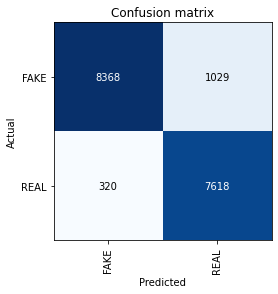

In [101]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

    Saving the trained model

In [105]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
learn.export('/kaggle/working/model.pkl')
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

    Testing of model

In [106]:
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Making function to test model
def classify_text(text):
    learn = load_learner('/kaggle/working/model.pkl')
    prediction = learn.predict(text)
    label = prediction[0]
    probabilities = prediction[2].numpy()   
    return label, probabilities
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->
#Calling the above functtions
text = str(input())
label, probabilities = classify_text(text)
print("Label:", label)
print("Probabilities:", probabilities)
#<------------------------------------------------------------------------------------------------------------------------------------------------------------->

 payal has accused filmmaker anurag kashyap of behaving inappropriately with her in a video that went viral she maintained her stance while speaking to etimes and said i have wanted to speak about this for a long time but today finally i thought i must get it off my head i had tweeted about my incident sometime ago when the metoo movement had happened but many people told me to delete the tweet else i would stop getting work my manager too advised me to remove the tweet i complied post that anurag blocked me on whatsapp


Label: REAL
Probabilities: [0.18497413 0.81502587]
